In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "sugar"

#CATEGORIES = ["finalsack","finalnosack"]
CATEGORIES = ["sack_aug"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

FileNotFoundError: [Errno 2] No such file or directory: 'sugar/sack_aug'

In [2]:
print(img_array)

[[ 31  68 126 ... 109 103 100]
 [ 28  68 128 ... 107 102  99]
 [ 19  58 121 ... 102 102 102]
 ...
 [ 95 114 141 ...  33  26  25]
 [134 142 153 ...  24  26  32]
 [142 149 157 ...  22  26  31]]


In [3]:
print(img_array.shape)

(200, 200)


In [4]:
# IMG_SIZE = 

# new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# plt.imshow(new_array, cmap='gray')
# plt.show()

In [5]:
training_data = []
IMG_SIZE=200
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_array=img_array
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))


In [6]:

create_training_data()

print(len(training_data))

100%|██████████| 13468/13468 [00:04<00:00, 2863.16it/s]

13468


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y=np.array(y)
Y.shape

[[[[130]
   [129]
   [129]
   ...
   [144]
   [142]
   [141]]

  [[129]
   [128]
   [129]
   ...
   [144]
   [142]
   [141]]

  [[128]
   [129]
   [131]
   ...
   [144]
   [143]
   [142]]

  ...

  [[ 39]
   [ 40]
   [ 40]
   ...
   [111]
   [108]
   [106]]

  [[ 38]
   [ 39]
   [ 40]
   ...
   [110]
   [107]
   [105]]

  [[ 38]
   [ 39]
   [ 39]
   ...
   [110]
   [107]
   [105]]]]


(13468,)

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [13]:
X = X/255.0


In [14]:
model = Sequential()

model.add(Conv2D(70, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(120, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1,activation="softmax"))

model.summary()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 70)      700       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 70)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 70)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 120)       75720     
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 120)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 120)       0         
_________________________________________________________________
flatten (Flatten)            (None, 276480)            0

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.fit(X, Y, batch_size=32, epochs=1, validation_split=0.3) 

Train on 3931 samples, validate on 1686 samples
3931/3931 [==============================] - 127s 32ms/sample - loss: 0.4688 - accuracy: 0.9555 - val_loss: 0.0063 - val_accuracy: 0.9994


In [17]:
model.save("finalsugar_2.h5")

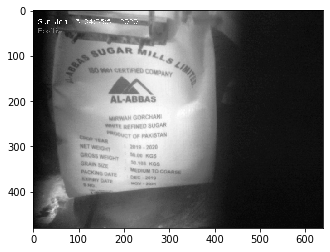

In [4]:
DATADIR = "sugar"


tCATEGORIES = ["test_sugar"]

for category in tCATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

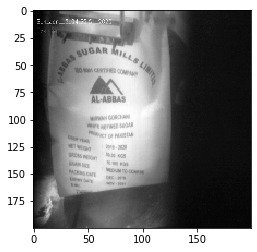

In [5]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
model=tf.keras.models.load_model("sack007.h5")

In [7]:
testing_data = []

def create_testing_data():
    for category in tCATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = tCATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))


In [8]:

create_testing_data()

print(len(testing_data))

100%|██████████| 10/10 [00:00<00:00, 426.55it/s]

10


In [9]:
tX = []
ty = []

for features,label in testing_data:
    tX.append(features)
    ty.append(label)

print(tX[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

tX = np.array(tX).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
tY=np.array(ty)
tY.shape

[[[[ 5]
   [ 5]
   [ 2]
   ...
   [12]
   [13]
   [15]]

  [[ 5]
   [ 5]
   [ 7]
   ...
   [12]
   [14]
   [15]]

  [[ 5]
   [ 6]
   [ 4]
   ...
   [13]
   [15]
   [17]]

  ...

  [[13]
   [15]
   [16]
   ...
   [ 7]
   [ 8]
   [10]]

  [[12]
   [13]
   [15]
   ...
   [ 7]
   [ 8]
   [ 8]]

  [[11]
   [13]
   [15]
   ...
   [ 7]
   [ 7]
   [ 7]]]]


(10,)

In [10]:
tX = tX/255.0

In [11]:
pre_out=model.predict_classes(tX)

In [12]:
pre_out

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [128]:

for x in pre_out:
    if ((x[0]==1)and( x[1]>=0.9e-17)):
        print("no sack")
        
    elif((x[0]==1)and(x[1]>4e-20)and(x[1]<9e-17)):
        print("sack")
        
    else: 
        pass
    

sack
no sack
no sack
sack
sack
sack
